In [8]:
import numpy as np
from skimage.draw import polygon
from scipy.ndimage import maximum_filter

In [3]:
mask = np.zeros((446, 446), dtype=np.uint8)

In [4]:
line1 = "0.47983106608675646 0.5094246998023225 0.3120748425286906 0.38632790332660666 0.3086292490609549 0.3910235555662465 0.47638547261902076 0.5141203520419624"
line2 = "0.7195901394133465 0.507270511345078 0.5240933706160501 0.3949638569296095 0.5198301519901584 0.4023850152783841 0.7153269207874547 0.5146916696938525"

In [5]:
def process_line(line, mask):
    # Convert the line of points into a list of floats
    points = [float(x) for x in line.strip().split()]
    # Separate x and y coordinates
    xs = points[0::2]
    ys = points[1::2]
    # Scale coordinates relative to 446 and convert to integer pixel indices
    xs_pixels = (np.array(xs) * 445).astype(np.int32)
    ys_pixels = (np.array(ys) * 445).astype(np.int32)
    # Ensure indices are within the valid range
    xs_pixels = np.clip(xs_pixels, 0, 445)
    ys_pixels = np.clip(ys_pixels, 0, 445)
    # Get the row and column indices for the polygon
    rr, cc = polygon(ys_pixels, xs_pixels, mask.shape)
    # Update the mask
    mask[rr, cc] = 1

In [6]:
process_line(line1, mask)
process_line(line2, mask)

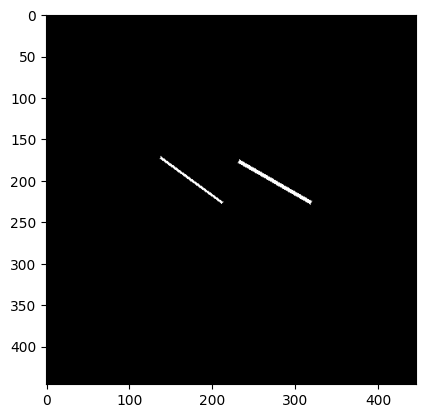

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mask, cmap='gray')
plt.show()

In [9]:
buffer_size = 20
filter_size = 2 * buffer_size + 1
buffered_mask = maximum_filter(mask, size=filter_size)

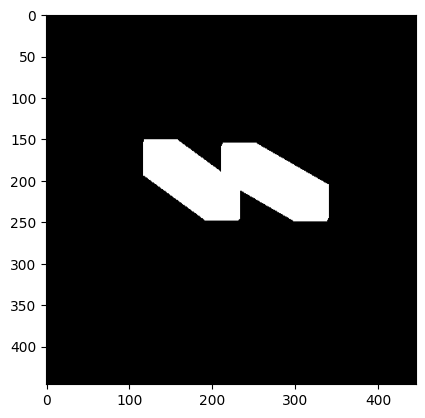

In [11]:
import matplotlib.pyplot as plt

plt.imshow(buffered_mask, cmap='gray')
plt.show()